In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal

# Data processing and manipulation techniques

## Discrete Fourier Transforms - What is a Fourier transform?

In this notebook we will be using Fourier transforms, exploring how we would code a Fourier transform and exploring how these can often provide a better way of visualizing data, in this case time-series data. In the field of signal-processing (which we will be exploring for coursework 2!) these can be incredibly powerful tool for being able to see signals buried in noise.

We will demonstrate all of this with code, and provide our own brief introduction here, but it is very beneficial to understand the theory behind this. In other modules (though this may depend on option choices) you should have already encountered Fourier transforms. However, to give an introduction to what these are there is some background watching for this notebook:

* https://www.youtube.com/watch?v=spUNpyF58BY&ab_channel=3Blue1Brown < An Introduction to Fourier transforms by YouTuber 3Blue1Brown
* https://www.youtube.com/watch?v=kP02nBNtjrU&ab_channel=LookingGlassUniverse < An introduction to Fourier series by YouTuber LookingGlassUniverse (part 1 of 2)
* https://www.youtube.com/watch?v=Xxut2PN-V8Q&ab_channel=LookingGlassUniverse < An introduction to Fourier series by YouTuber LookingGlassUniverse (part 2 of 2) 
* https://moodle.port.ac.uk/mod/lti/view.php?id=2166844 < An Introduction to Fourier series by Ian.

Please do watch over these in advance of the lecture! I will briefly recap the bottom video in the lecture.

## Discrete Fourier Transforms - What we need to remember for coding

Here we again introduce what a discrete Fourier transform is. This is *not* a replacement for the videos above, but a supplement to it.

Any time series $x(t)$ can be sampled as a set of discrete points $x[t_n]$ or $x_n$ for short. This is often necessary in the real world where, for example, we are measuring a quantity 100 times every second obtaining a discretely sampled representation of the thing being measured.

Like Fourier transforms of continuous data, a discretely sample times series $x_n$ can be represented as the sum of a set of sine waves with different frequencies and amplitudes. $X[f_k]$ or $X_k$ for short represents the amplitudes and phases as a function of the sine wave frequency (denoted k). To represent a time series of length N we need N independent variables.

The Fourier transform is used to express $X_k$ in terms of $x_n$. It is given by:

$X_k = \sum_{n=0}^{N-1} x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

Likewise the inverse Fourier transform is used to obtain $x_n$ from $X_k$. It is given by:

$x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k \left[ \cos({2 \pi k n / N}) + i \sin({2 \pi k n / N}) \right]$

In the general case both $x[t_n]$ and $X[f_k]$ are sequences of complex numbers **with the same length**. However, often we will be dealing with time series of real data. In this case there is symmetry in the Frequency-domain representation such that

$X_{N-j} = X_J^{*}$

In this case, because of the symmetry, you only need the values up to $X_{N/2}$ to fully define the Fourier transform of $x_n$. The frequency corresponding to $k=N/2$ is the "Nyquist frequency".

Enough math, let's demonstrate this.


## Exercise 1.1: Constructing a Fourier transform (a hard first exercise here, but an important one .... this notebook is shorter than some previous ones)

Let's consider a stretch of data 16 seconds long, sampled 16 times a second (so 256 samples, or `len(data_time_domain) = 256`). This data is given by a sinusoid. Using the equations above, write a function to compute the Fourier transform of this data. Then inverse Fourier transform the data and verify that you get the original time series. Here we've written the relevant plotting codes, but we have not written the Fourier transform and inverse Fourier transform. That's your task!

Text(0, 0.5, 'Amplitude')

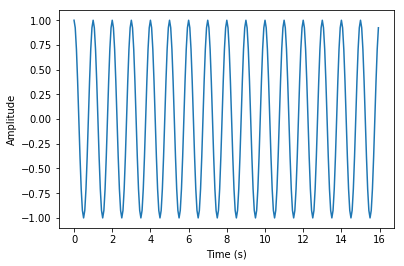

In [ ]:
omega = 1. * (2*np.pi)
data_length = 256
sample_rate = 1. / 16.
times = np.arange(data_length) * sample_rate
data_time_domain = np.cos(times * omega)
plt.plot(times,data_time_domain)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

### HARD VERSION

If you are happy coding up the equations given above, let's just plug them in here and run the code on the cell below to check if it works. If you don't know where to start with this, scroll down to the easier version and we will guide you through it!

In [ ]:
def compute_fourier_transform(data_time_domain):
    # FILL IN THE MISSING CODE
    return data_frequency_domain

def compute_inverse_fourier_transform(data_frequency_domain):
    # FILL IN THE MISSING CODE
    return data_time_domain / N



In [ ]:
# Here's how you would plot the Fourier transformed data. 
frequencies = np.arange(256) * (1./(data_length*sample_rate))
data_frequency_domain = compute_fourier_transform(data_time_domain)
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag) # This is complex, so need two lines
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

# Make sure that the inverted data is equal to the original data!
plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain_inverted.real, 'k-')
plt.plot(times, data_time_domain_inverted.imag, 'b-') # This is complex, so need two lines
plt.plot(times, data_time_domain, 'r:')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component', 'Original data'])


### EASY(IER) VERSION

Okay, let's break this down into stages. We need to compute

$X_k = \sum_{n=0}^{N-1} x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

but this has a bunch of stages, and a summation, and needs to produce a vector of outputs. Let's break this down.

#### PART 1

The bulk of this will be computing the bit inside the sum:

$x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

This contains 4 things that will vary: $k$, $n$, $N$ and $x_n$. So first write a function that takes these 4 inputs and computes

$x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$


In [5]:
def fourier_transform_inner_bit(x_n, k, n, N):
    # ADD CODE HERE. Note that x_n, k, n, N are *not* numpy arrays, but are floats, this should return a complex number (one number)
    # We're just going to call this *lots* of times!



In [13]:
# Run this to validate the function above
print("Your code gives", fourier_transform_inner_bit(2, 3, 1, 10), "it should say (-0.6180339887498947-1.9021130325903073j)")
print("Your code gives", fourier_transform_inner_bit(4, 5, 2, 12), "it should say (2.0000000000000004+3.4641016151377544j)")


Your code gives (-0.6180339887498947-1.9021130325903073j) it should say (-0.6180339887498947-1.9021130325903073j)
Your code gives (2.0000000000000004+3.4641016151377544j) it should say (2.0000000000000004+3.4641016151377544j)


#### PART 2 

Okay we wrote a function to compute that inner part. Let's call this $F_1(x_n, k, n, N)$ where

$F_1(x_n, k, n, N) = x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

then our original equation

$X_k = \sum_{n=0}^{N-1} x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

becomes

$X_k = \sum_{n=0}^{N-1} F_1(x_n, k, n, N)$

so now let's compute

\sum_{n=0}^{N-1} F_1(x_n, k, n, N)$

To do this write a function, which will take $x$, $k$ and $N$ as inputs and should return the sum.

**NOTE** $x$ is now a numpy array! When calling $F_1$ we should use $x_n$, which is the nth element of $x$ or `x[n]`


In [ ]:
def fourier_transform_first_sum(x, k, N):
    # ADD CODE HERE. Note that k and N are floats. x is a numpy array.
    # This should contain a for loop where you loop over n, choose x_n from x and then call F_1
    # This should return a complex number


In [21]:
# Run this to verify your codde
print("Your code gives", fourier_transform_first_sum(np.arange(10), 3, 10), "it should say (-5.000000000000003+3.632712640026803j)")
print("Your code gives", fourier_transform_first_sum(np.logspace(1,1.2,12), 5, 12), "it should say (-3.1900677019085393+0.8739794353193151j)")


Your code gives (-5.000000000000003+3.632712640026803j) it should say (-5.000000000000003+3.632712640026803j)
Your code gives (-3.1900677019085393+0.8739794353193151j) it should say (-3.1900677019085393+0.8739794353193151j)


#### PART 3

Now we have a function $F_2(x, k, N)$ so we can write

$X_k = F_2(x, k, N)$

However, we want to compute $X_k$ for all possible values of k such that $X$ is also a numpy array of complex numbers). We'll do this in the following steps:

* Our function should take as input $x$; the data in the time domain (`data_time_domain` in the example above). This is a numpy array.
* Our function should output $X$ the Fourier transform, which is an array of complex numbers. Considering the stuff written above, we'll make $X$ the same length as $x$ (which will result in some symmetry in the output, as we'll explore later).
* Define N to be the length of $x$
* Create an empty array of complex numbers $X$, which should be the same length as $x$.
* Loop over k (from 0 to N-1 (inclusive)). For each value of k set `X[k] = F_2(x, k, N)`
* Return output




In [24]:
def compute_fourier_transform(x):
    # FILL IN THE MISSING CODE

    return X


In [26]:
# Run this to verify your code

your_output_1 = compute_fourier_transform(np.arange(10))
stock_output_1 = np.array([45.+0.00000000e+00j, -5.+1.53884177e+01j, -5.+6.88190960e+00j,
                           -5.+3.63271264e+00j, -5.+1.62459848e+00j, -5.-5.51091060e-15j,
                           -5.-1.62459848e+00j, -5.-3.63271264e+00j, -5.-6.88190960e+00j,
                           -5.-1.53884177e+01j])
# YOU NEED TO CHECK THAT stock_output_1 and your_output_1 are the same!!!

print(your_output_1)
your_output_2 = compute_fourier_transform(np.logspace(1,1.2,12))
print(your_output_2)
stock_output_2 = np.array([152.65360821+0.00000000e+00j, -2.2498741 +1.20995246e+01j,
                           -2.99043154+5.64225487e+00j, -3.12673016+3.26041003e+00j,
                           -3.17221609+1.88294825e+00j, -3.1900677 +8.73979435e-01j,
                           -3.19496902+7.67154354e-14j, -3.1900677 -8.73979435e-01j,
                           -3.17221609-1.88294825e+00j, -3.12673016-3.26041003e+00j,
                           -2.99043154-5.64225487e+00j, -2.2498741 -1.20995246e+01j])
# YOU NEED TO CHECK THAT stock_output_2 and your_output_2 are the same!!!


[45.+0.00000000e+00j -5.+1.53884177e+01j -5.+6.88190960e+00j
 -5.+3.63271264e+00j -5.+1.62459848e+00j -5.-5.51091060e-15j
 -5.-1.62459848e+00j -5.-3.63271264e+00j -5.-6.88190960e+00j
 -5.-1.53884177e+01j]
[152.65360821+0.00000000e+00j  -2.2498741 +1.20995246e+01j
  -2.99043154+5.64225487e+00j  -3.12673016+3.26041003e+00j
  -3.17221609+1.88294825e+00j  -3.1900677 +8.73979435e-01j
  -3.19496902+7.67154354e-14j  -3.1900677 -8.73979435e-01j
  -3.17221609-1.88294825e+00j  -3.12673016-3.26041003e+00j
  -2.99043154-5.64225487e+00j  -2.2498741 -1.20995246e+01j]


#### PART 4

Now we need to define the *inverse* Fourier transform. Compare the equations. This is basically the same as the Fourier transform. So repeat parts 1 - 3, with the necessary small modification, and write an inverse Fourier transform

In [29]:

def compute_inverse_fourier_transform(X):
    # FILL IN THE MISSING CODE ... You will need some additional functions as well if following the form above!

    return x


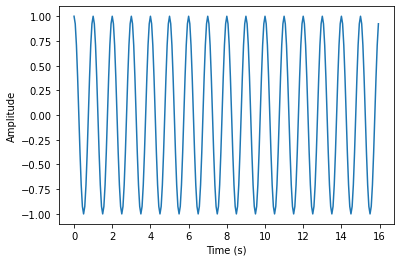

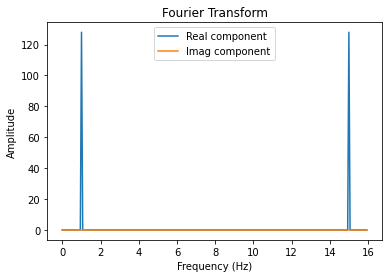

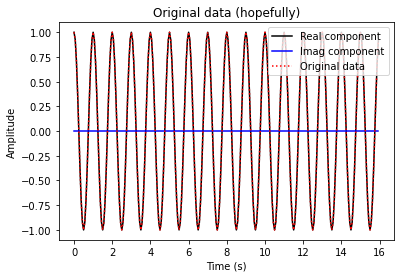

In [31]:
# If your code above is working, the following should plot the data, it's Fourier transform, 
# and then the inverse of that (which should be identical to the original data)

# Create data
omega = 1. * (2*np.pi)
data_length = 256
sample_rate = 1. / 16.
times = np.arange(data_length) * sample_rate
data_time_domain = np.cos(times * omega)
plt.plot(times,data_time_domain)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Here's how you would plot the Fourier transformed data.
plt.figure()
frequencies = np.arange(256) * (1./(data_length*sample_rate))
data_frequency_domain = compute_fourier_transform(data_time_domain)
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag) # This is complex, so need two lines
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

# Make sure that the inverted data is equal to the original data!
plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain_inverted.real, 'k-')
plt.plot(times, data_time_domain_inverted.imag, 'b-') # This is complex, so need two lines
plt.plot(times, data_time_domain, 'r:')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component', 'Original data'])


#### Exercise 1.2: Repeat the process with the following data

Repeat the process, but with the following 4 datasets (`data_time_domain_CASE_1`, `data_time_domain_CASE_2`, `data_time_domain_CASE_3` and `data_time_domain_CASE_4`)? What do you notice about the Fourier transforms in each case? For each case you should

* Plot the original data
* Fourier transform the data, using your hand-written routine, and plot that.
* Inverse Fourier transform, using your routine, and plot that.
* Comment in-line what you notice about each case. Discuss with classmates and/or TAs and the lecturer.

In [ ]:
omega = 1. * (2*np.pi)
sample_rate = 1. / 16.
times = np.arange(256) * sample_rate
data_time_domain_CASE_1 = np.sin(times * omega)

data_time_domain_CASE_2 = np.sin(times * omega) + np.cos(times*2*omega) + np.sin(times*3*omega)

data_time_domain_CASE_3 = np.random.normal(size=256)

data_time_domain_CASE_4 = np.zeros(256)
data_time_domain_CASE_4[3] = 1.

#### Exercise 1.3:

What is the computational complexity of your algorithm? This means, if I make the input vector twice as big (or three times as big or ...) and plot how long the algorithm takes to run what shape does it follow. We can use the build in ipython function `timeit` to evaluate this.

*Plot the output from the timeit commands below, how does the speed of your code scale as the length of the input increases?*

In [ ]:
# This will time your function for a set of lengths. You need to run this, plot the data that comes out and
# examine the resulting curve. Does it follow a y = a * x**2 + b * x + c curve?

# WARNING: These data sets are longer than 256 samples. Make sure your Fourier transform function can handle that! 
data_time_domain_CASE_3 = np.random.normal(size=256)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)
data_time_domain_CASE_3 = np.random.normal(size=256*2)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)
data_time_domain_CASE_3 = np.random.normal(size=256*3)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)
data_time_domain_CASE_3 = np.random.normal(size=256*4)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)
data_time_domain_CASE_3 = np.random.normal(size=256*5)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)
data_time_domain_CASE_3 = np.random.normal(size=256*6)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)
data_time_domain_CASE_3 = np.random.normal(size=256*7)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)
data_time_domain_CASE_3 = np.random.normal(size=256*8)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)
data_time_domain_CASE_3 = np.random.normal(size=256*9)
%timeit -n 2 -r 2 compute_fourier_transform(data_time_domain_CASE_3)

#### Exercise 1.4:

Use library functions to perform a Fourier transform. There are a few ways of doing this, but the simplest (IMO) is to use numpy to call into the FFTW algorithm. The FFTW algorithm has N log N complexity, so much faster for large Fourier transforms (FFT = Fast Fourier Transform, FFTW is a specific algorithm and stands for "Fastest Fourier Transform in the West"). Here you must first demonstrate this on the original data stream.


In [ ]:
def compute_fourier_transform_numpy(data_time_domain):
    # FILL IN THE MISSING CODE, using the numpy library to perform an FFT. Google how to use it!
    return data_frequency_domain

def compute_inverse_fourier_transform_numpy(data_frequency_domain):
    # FILL IN THE MISSING CODE, using the numpy library to perform an IFFT. Google how to use it!
    return data_time_domain



In [ ]:
# Here's an example of using your functions to call numpy's FFT on the first example.
omega = 1. * (2*np.pi)
data_length = 16
sample_rate = 16.
times = np.arange(256) / sample_rate
frequencies = np.arange(256) * (1./(data_length*sample_rate))
data_time_domain = np.cos(times * omega)
plt.plot(times,data_time_domain)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

data_fourier_domain = compute_fourier_transform_numpy(data_time_domain)
plt.figure()
plt.plot(frequencies, data_fourier_domain.real)
plt.plot(frequencies, data_fourier_domain.imag)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

plt.figure()
data_time_domain_inv = compute_inverse_fourier_transform_numpy(data_fourier_domain)
plt.plot(times, data_time_domain_inv.real)
plt.plot(times, data_time_domain_inv.imag)
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

**More tasks for you:**

* Use numpy's FFT algorithm on the other data streams.
* Time numpy's FFT algorithm and compare to your algorithm


## Part 1: Summary

Main points from these exercises:

* The Fourier transform is a highly useful tool for data analysis. Sometimes features that are not obvious in the time domain, can be clearly seen in the frequency domain.
* It is possible to code our own Fourier transform routine, but library codes are *very* fast at doing this. As long as we understand the principles, let's just use the library codes!
* Features in the time-domain that are very narrow will be very broad in the frequency domain, and vice-versa. 

**NOTE**: As a lot of this (and future classes) can be directly used in the coursework we will be releasing partial solutions to these classes. Example plots will be shown, but the important code will be removed. Please do let us know if you need help getting solutions to any of this.

## Part 2: Aliasing

We generated a data stream 16 seconds long, sampled 16 times a second .... This means that we had 256 data points, and 16 samples are taken every second, so sample 0 is at t=0s, sample 1 as at t=1/16.s, sample 2 is at t=2/16.s, sample 16 is at t=16/16=1s.

The maximum frequency in our Fourier transform was 15.9375 Hz. Can we really measure frequencies that high if only taking one data reading every 1/16 of a second? Let's see what happens if we consider a sine-wave with a frequency of 15.9375 (so it should have almost 16 cycles in a second), and we take a point from this sine wave once every 1/16 of a second

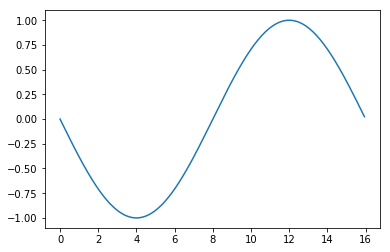

In [ ]:
omega = (255./16.) * (2*np.pi)
sine_wave = np.sin(omega * times)

plt.plot(times,sine_wave)

Clearly this is not a sine wave oscillating almost 16 times a second! This is aliasing. If you try to sample a time series with frequency content above the Nyquist frequency (8Hz in this case), that content will appear reduced in frequency. This is important with music (for example) where you want the sounds to sound like they should when played back!

In fact a sine wave of 31.9735 Hz or 47.9725 Hz or ... will all appear the same as this one when sampled at 16Hz. This is why sometimes Fourier transforms, instead of quoting frequencies above the Nyquist (8Hz to 16Hz in our case), quote negative frequencies (-8Hz to 8Hz). The content at -7Hz is *identical* to content at 15Hz according to this aliasing (and 15Hz content will appear as 1Hz content unless you are considering complex input).

### Exercises 2

* Sample a 4000Hz sine wave at 300Hz. What frequency does it have now? Fourier transform this data to confirm.
* Sample a 4000Hz sine wave at 250Hz. What frequency does it have now? Fourier transform this data to confirm.
* Create a dataset consisting of sine waves at 150Hz, 250Hz, 350 Hz, and 450Hz (randomly choose the phase). Sample this data at 65Hz. What is the frequency content of this aliased output?

## Part 2: Summary

Aliasing is a problem when discretely sampling data. If possible it is better to sample the data at a higher rate, *remove* the high frequency content (see the next notebook), and then downsample the data.